In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [41]:
file=r'C:\Users\toshiba\Desktop\fire forest\Data1\mice_imputed.csv'
df=pd.read_csv(file)

In [42]:
df=df.drop(['Unnamed: 0','FireSeason'],axis=1)
df.dtypes

Month                            int64
individual_fire_num              int64
PrepLevel                        int64
day0_F_min                     float64
day0_F_mean                    float64
day0_F_max                     float64
day0_IN_Sea_level              float64
day0_F_Mean_dew_point          float64
day0_IN_tot_rain               float64
day0_MI_visibilty              float64
day0_MPH_mean_wind_speed       float64
day0_MPH_max_sustained_wind    float64
day0_MPH_max_wind              float64
day1_F_min                     float64
day1_F_mean                    float64
day1_F_max                     float64
day1_IN_Sea_level              float64
day1_F_Mean_dew_point          float64
day1_IN_tot_rain               float64
day1_MI_visibilty              float64
day1_MPH_mean_wind_speed       float64
day1_MPH_max_sustained_wind    float64
day1_MPH_max_wind              float64
day2_F_min                     float64
day2_F_mean                    float64
day2_F_max               

In [43]:
df[['Month','PrepLevel']] = df[['Month','PrepLevel']].astype('category',copy=False)

In [44]:
df = pd.get_dummies(df, prefix=[ 'Month','PrepLevel'], 
                    columns=['Month','PrepLevel'])

In [45]:
df

,individual_fire_num,day0_F_min,day0_F_mean,day0_F_max,day0_IN_Sea_level,day0_F_Mean_dew_point,day0_IN_tot_rain,day0_MI_visibilty,day0_MPH_mean_wind_speed,day0_MPH_max_sustained_wind,...,Month_8,Month_9,Month_10,Month_11,Month_12,PrepLevel_1,PrepLevel_2,PrepLevel_3,PrepLevel_4,PrepLevel_5
0,62,34.0,43.9,53.1,29.86,37.3,0.00,26.8,8.75,13.81,...,0,0,0,0,0,1,0,0,0,0
1,10,38.8,48.1,55.9,30.07,39.7,0.00,29.8,8.75,12.77,...,0,0,0,0,0,1,0,0,0,0
2,28,42.1,49.0,59.9,29.93,42.0,0.00,39.4,9.67,14.96,...,0,0,0,0,0,1,0,0,0,0
3,20,39.9,49.2,60.1,29.57,37.8,0.00,32.5,15.08,21.86,...,0,0,0,0,0,0,1,0,0,0
4,20,43.0,50.7,56.8,29.88,40.5,0.01,38.1,12.77,21.86,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,1,32.0,43.3,52.0,29.89,37.6,0.28,9.4,18.87,36.94,...,0,1,0,0,0,1,0,0,0,0
3244,0,32.0,41.1,53.6,30.24,35.5,0.02,10.0,9.55,19.68,...,0,1,0,0,0,1,0,0,0,0
3245,0,46.0,48.3,53.1,30.21,40.5,0.00,10.0,14.27,19.68,...,0,1,0,0,0,1,0,0,0,0
3246,20,37.0,43.2,53.1,29.97,37.7,0.00,10.0,9.55,12.77,...,0,0,1,0,0,1,0,0,0,0


In [46]:
#df_inputs=df.drop(['Fire_Severity','FireSeason'],axis=1)
df_inputs=df.drop(['Fire_Severity'],axis=1)
label=df['Fire_Severity']
##print(label)
df_inputs.insert(0,'Labels',label)
df=df_inputs
df

,Labels,individual_fire_num,day0_F_min,day0_F_mean,day0_F_max,day0_IN_Sea_level,day0_F_Mean_dew_point,day0_IN_tot_rain,day0_MI_visibilty,day0_MPH_mean_wind_speed,...,Month_8,Month_9,Month_10,Month_11,Month_12,PrepLevel_1,PrepLevel_2,PrepLevel_3,PrepLevel_4,PrepLevel_5
0,Small,62,34.0,43.9,53.1,29.86,37.3,0.00,26.8,8.75,...,0,0,0,0,0,1,0,0,0,0
1,Small,10,38.8,48.1,55.9,30.07,39.7,0.00,29.8,8.75,...,0,0,0,0,0,1,0,0,0,0
2,Large,28,42.1,49.0,59.9,29.93,42.0,0.00,39.4,9.67,...,0,0,0,0,0,1,0,0,0,0
3,Small,20,39.9,49.2,60.1,29.57,37.8,0.00,32.5,15.08,...,0,0,0,0,0,0,1,0,0,0
4,Small,20,43.0,50.7,56.8,29.88,40.5,0.01,38.1,12.77,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,Large,1,32.0,43.3,52.0,29.89,37.6,0.28,9.4,18.87,...,0,1,0,0,0,1,0,0,0,0
3244,Severe,0,32.0,41.1,53.6,30.24,35.5,0.02,10.0,9.55,...,0,1,0,0,0,1,0,0,0,0
3245,Small,0,46.0,48.3,53.1,30.21,40.5,0.00,10.0,14.27,...,0,1,0,0,0,1,0,0,0,0
3246,Small,20,37.0,43.2,53.1,29.97,37.7,0.00,10.0,9.55,...,0,0,1,0,0,1,0,0,0,0


In [47]:
df.shape

(3248, 69)

In [48]:
def dataframe_normalize(df,label):
    y=df[label]
    
    X=df.drop(label,axis=1)
    
    scaler = MinMaxScaler()
    scaler.fit(X)
    x_transformed=scaler.transform(X)
    
    np_x=x_transformed
    y=y.to_numpy()
    
    ##print(np_x)
    
    return np_x,y

    

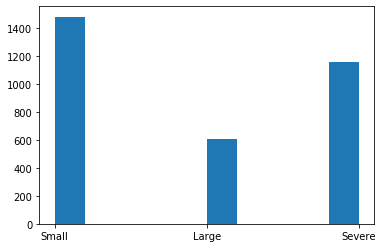

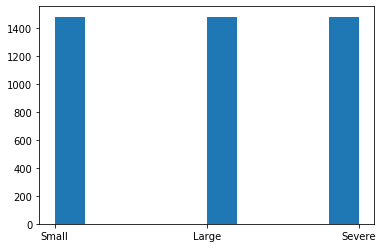

,Labels,individual_fire_num,day0_F_min,day0_F_mean,day0_F_max,day0_IN_Sea_level,day0_F_Mean_dew_point,day0_IN_tot_rain,day0_MI_visibilty,day0_MPH_mean_wind_speed,...,Month_8,Month_9,Month_10,Month_11,Month_12,PrepLevel_1,PrepLevel_2,PrepLevel_3,PrepLevel_4,PrepLevel_5
0,Small,62,34.000000,43.900000,53.100000,29.860000,37.300000,0.000000,26.800000,8.750000,...,0,0,0,0,0,1,0,0,0,0
1,Small,10,38.800000,48.100000,55.900000,30.070000,39.700000,0.000000,29.800000,8.750000,...,0,0,0,0,0,1,0,0,0,0
2,Large,28,42.100000,49.000000,59.900000,29.930000,42.000000,0.000000,39.400000,9.670000,...,0,0,0,0,0,1,0,0,0,0
3,Small,20,39.900000,49.200000,60.100000,29.570000,37.800000,0.000000,32.500000,15.080000,...,0,0,0,0,0,0,1,0,0,0
4,Small,20,43.000000,50.700000,56.800000,29.880000,40.500000,0.010000,38.100000,12.770000,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,Severe,1,28.084330,41.984667,48.268321,29.916516,41.093347,0.211567,2.883992,9.988163,...,0,0,0,0,0,1,0,0,0,0
4442,Severe,2,45.546479,53.546479,61.498873,29.744535,48.289577,0.117915,8.863944,7.845409,...,0,0,0,0,0,0,0,1,0,0
4443,Severe,2,48.124279,51.724279,59.151897,29.736525,47.800000,0.165857,9.672382,11.399362,...,0,1,0,0,0,0,1,0,0,0
4444,Severe,2,47.135148,60.556757,71.313539,29.837839,47.600024,0.000000,8.708094,12.235421,...,0,0,0,0,0,0,0,0,0,0


In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
y=df['Labels']
plt.hist(y)
plt.show()

df_x=df.drop('Labels',axis=1)
X_smote,y_smote = sm.fit_sample(df_x, y)

X_smote.insert(0,'Labels',y_smote)

plt.hist(y_smote)
plt.show()

X_smote

[[0.17514124 0.63106796 0.6219641  ... 0.         0.         0.        ]
 [0.02824859 0.68932039 0.66631468 ... 0.         0.         0.        ]
 [0.07909605 0.72936893 0.67581837 ... 0.         0.         0.        ]
 ...
 [0.00564972 0.80247912 0.70458584 ... 0.         0.         0.        ]
 [0.00564972 0.7904751  0.79785383 ... 0.         0.         0.        ]
 [0.         0.67434377 0.65779737 ... 0.         0.         0.        ]]
['Small' 'Small' 'Large' ... 'Severe' 'Severe' 'Severe']


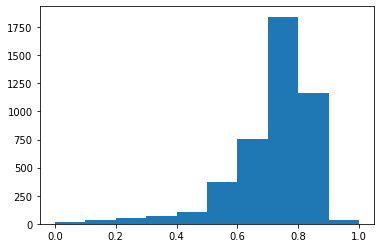

In [50]:
np_x,y=dataframe_normalize(X_smote,'Labels')

print(np_x)
print(y)
plt.hist(np_x[:,1])
plt.show()

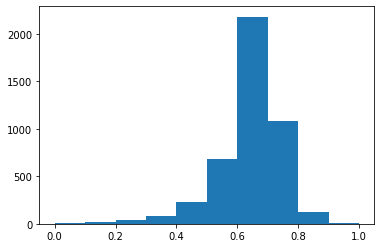

In [51]:
plt.hist(np_x[:,3])
plt.show()

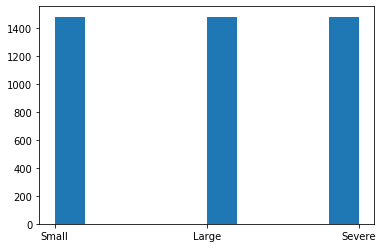

In [52]:
plt.hist(y)
plt.show()

In [53]:
print(y)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_encoded = ohe.fit_transform(y.reshape(-1,1)).toarray()
y_encoded

['Small' 'Small' 'Large' ... 'Severe' 'Severe' 'Severe']


array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(np_x,y_encoded,test_size = 0.2)
print(X_train.shape)
print(y_test.shape)

(3556, 68)
(890, 3)


In [55]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [56]:
model = Sequential()
model.add(Dense(34, input_dim=68, activation='relu'))
model.add(Dense(17, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 34)                2346      
_________________________________________________________________
dense_14 (Dense)             (None, 17)                595       
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 144       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 27        
Total params: 3,112
Trainable params: 3,112
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 3556 samples, validate on 890 samples
Epoch 1/100
3556/3556 [==============================] - 1s 281us/step - loss: 1.0889 - accuracy: 0.4066 - val_loss: 1.0563 - val_accuracy: 0.4978
Epoch 2/100
3556/3556 [==============================] - 0s 62us/step - loss: 1.0223 - accuracy: 0.5121 - val_loss: 0.9875 - val_accuracy: 0.5112
Epoch 3/100
3556/3556 [==============================] - 0s 62us/step - loss: 0.9508 - accuracy: 0.5312 - val_loss: 0.9208 - val_accuracy: 0.5348
Epoch 4/100
3556/3556 [==============================] - 0s 66us/step - loss: 0.8982 - accuracy: 0.5540 - val_loss: 0.8817 - val_accuracy: 0.5978
Epoch 5/100
3556/3556 [==============================] - 0s 70us/step - loss: 0.8674 - accuracy: 0.5891 - val_loss: 0.8737 - val_accuracy: 0.5719
Epoch 6/100
3556/3556 [==============================] - 0s 64us/step - loss: 0.8563 - accuracy: 0.6080 - val_loss: 0.8484 - val_accuracy: 0.6124
Epoch 7/100
3556/3556 [==============================] - 0s 63us/step - loss

3556/3556 [==============================] - 0s 70us/step - loss: 0.7384 - accuracy: 0.6696 - val_loss: 0.7529 - val_accuracy: 0.6775
Epoch 57/100
3556/3556 [==============================] - 0s 72us/step - loss: 0.7387 - accuracy: 0.6662 - val_loss: 0.7623 - val_accuracy: 0.6685
Epoch 58/100
3556/3556 [==============================] - 0s 70us/step - loss: 0.7345 - accuracy: 0.6772 - val_loss: 0.7502 - val_accuracy: 0.6775
Epoch 59/100
3556/3556 [==============================] - 0s 69us/step - loss: 0.7425 - accuracy: 0.6707 - val_loss: 0.7454 - val_accuracy: 0.6775
Epoch 60/100
3556/3556 [==============================] - 0s 67us/step - loss: 0.7327 - accuracy: 0.6713 - val_loss: 0.7576 - val_accuracy: 0.6764
Epoch 61/100
3556/3556 [==============================] - 0s 72us/step - loss: 0.7410 - accuracy: 0.6721 - val_loss: 0.7491 - val_accuracy: 0.6798
Epoch 62/100
3556/3556 [==============================] - 0s 66us/step - loss: 0.7418 - accuracy: 0.6651 - val_loss: 0.7674 - val_a

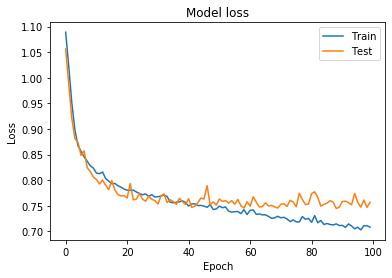

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

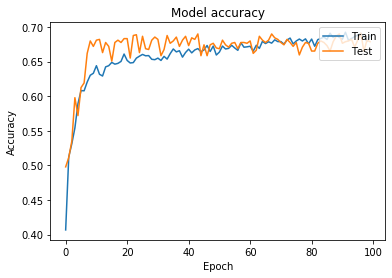

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [35]:
y_pred = model.predict(X_test)
pred = []
for i in range(len(y_pred)):
    #print(np.argmax(y_pred[i]))
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
     test.append(np.argmax(y_test[i]))

In [36]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
results = confusion_matrix(test, pred)
print('===================================')
print(results)
print('Accuracy Score :',accuracy_score(test, pred) )
print('Report : ')
print(classification_report(test, pred))
    

[[232  18  45]
 [102 128  62]
 [ 47  12 244]]
Accuracy Score : 0.6786516853932584
Report : 
              precision    recall  f1-score   support

           0       0.61      0.79      0.69       295
           1       0.81      0.44      0.57       292
           2       0.70      0.81      0.75       303

    accuracy                           0.68       890
   macro avg       0.70      0.68      0.67       890
weighted avg       0.70      0.68      0.67       890



In [24]:
!pwd

/c/Users/toshiba/Desktop/fire forest/Images
